- Context : 
      For the first time, Kaggle conducted an industry-wide survey to establish a comprehensive veiw of the state of  data science and machine learning. The survey received over 16,000 responses and we learned a ton about who is working with data, what's happening at the cutting edge of machine learning across industries and how new data scientists can best break into the fields


- Content:
        The data includes 5 files:
        
        schema.csv: a CSV file with survey schema. This schema includes the questions that correspond to each 
        column name in both the multipleChoiceResponses.csv and freeformResponses.csv.
        
        multipleChoiceResponses.csv: Respondents' answers to multiple choice and ranking questions. 
        These are non-randomized and thus a single row does correspond to all of a single user's answers.
            
        freeformResponses.csv: Respondents' freeform answers to Kaggle's survey questions. These 
        responses are randomized within a column, so that reading across a single row does not give a 
        single user's answers.
            
        conversionRates.csv: Currency conversion rates (to USD) as accessed from the R package "quantmod"
        on September 14, 2017
            
        RespondentTypeREADME.txt: This is a schema for decoding the responses in the "Asked" column of 
        the schema.csv file.

## 1. Library

In [1]:
# import the standard python scientific libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# To draw a graph in a notebook
%matplotlib inline

# Suppress deprecation and incorrect usage warnings
import warnings
warnings.filterwarnings('ignore')


## 2. Import

In [2]:
question = pd.read_csv('schema.csv')
question.shape

(290, 3)

In [3]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [4]:
# Bring the responds to multiple-choice multiple
mcq = pd.read_csv('multipleChoiceResponses.csv',encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [5]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

## 3. Survey Response Analysis 1

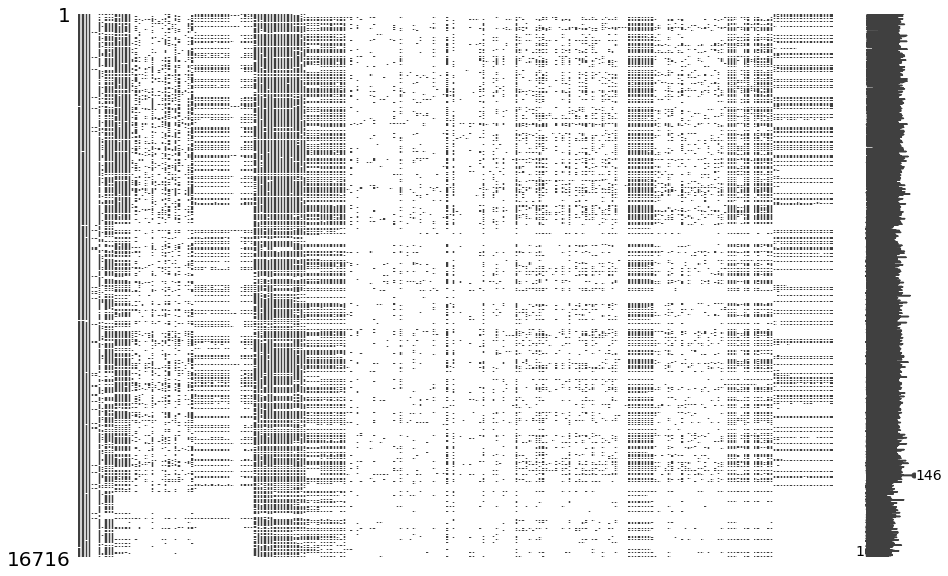

In [7]:
# missingno visualizes NaN data
# Since there are many columns of NaN data, it is difficult to grasp the contents with the graph below.

import missingno as msno
msno.matrix(mcq, figsize=(15,10))

Note: 
It answers 16,716 data, 228 multiple-choice questions, and 62 questions. (Total 290 questions) Many unanswered questions

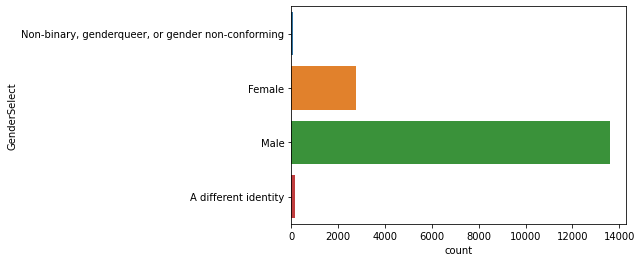

In [8]:
# Gender
sns.countplot(y='GenderSelect', data=mcq)

Note: The proportion of men is much higher than that of women


In [9]:
# Number of responses by country
con_df = pd.DataFrame(mcq['Country'].value_counts()) # 그룹화로 카운트된 숫자 표시
con_df['국가']=con_df.index  # 인덱스를 하나의 컬럼으로 나타냄
con_df.columns = ['Num_of_Response', 'Country']
con_df = con_df.reset_index().drop('index', axis=1)

con_df.head(10)

,Num_of_Response,Country
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [10]:
# View information about age.

mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

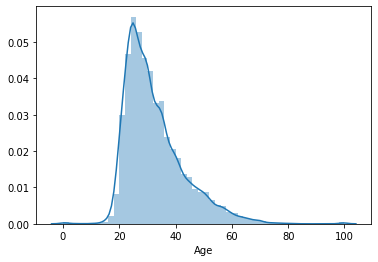

In [11]:
sns.distplot(mcq['Age'])

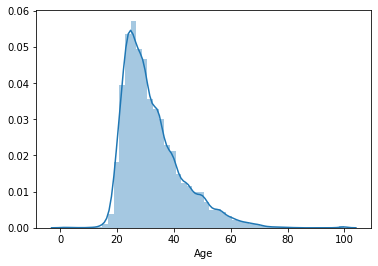

In [12]:
sns.distplot(mcq[mcq['Age']>0]['Age'])

Note: 
Most of the respondents are young,
It is rapidly increasing from the 20s, and the most in the 30s.
The average age is 32.

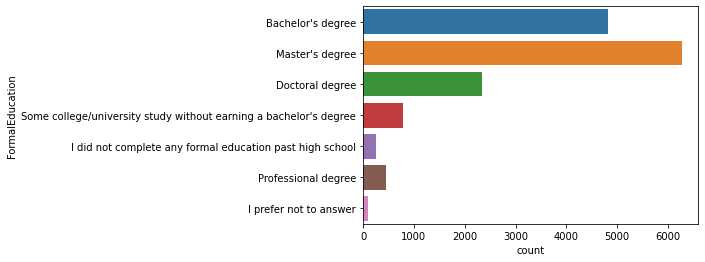

In [13]:
# Education
sns.countplot(y='FormalEducation', data=mcq)

Note : 
More people have a master's degree than people with a bachelor's degree, and many people have a doctorate.

In [14]:
# Major

mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True)) # 비율을 구할 수 있음

mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True )
mcq_major_df.columns = ['num_of_response', 'proportion']
mcq_major_df.head()

,num_of_response,proportion
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851


Note: 
Computer majors are the largest with 33%, followed by mathematics, engineering, and electrical engineering.

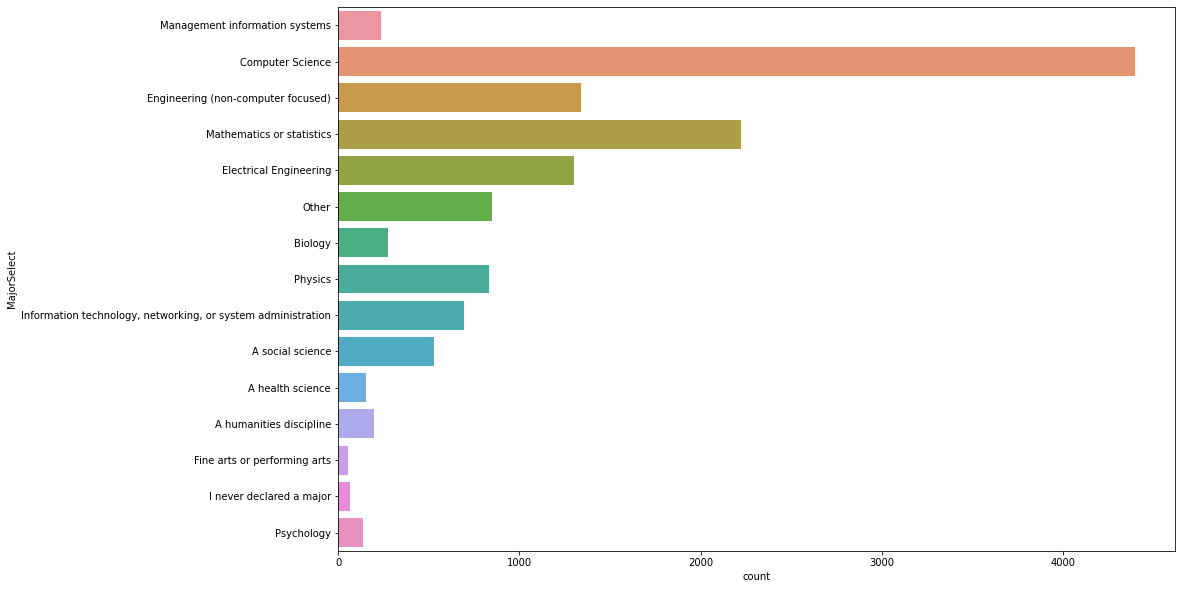

In [15]:
# Current status of majors in school
plt.figure(figsize=(15,10))
sns.countplot(y='MajorSelect', data=mcq)

In [16]:
# Work status
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns= ['num_of_response', 'proportion']
mcq_es_df.head()

,num_of_response,proportion
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858


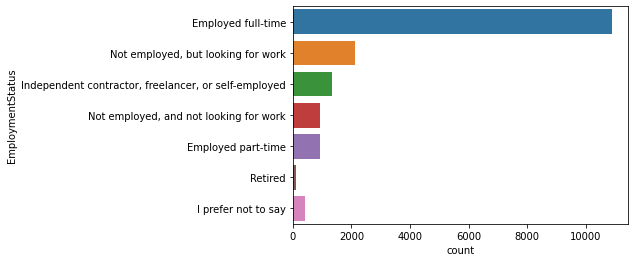

In [17]:
sns.countplot(y='EmploymentStatus', data=mcq)

Note: 
65% of respondents work full-time, followed by job seekers 12%

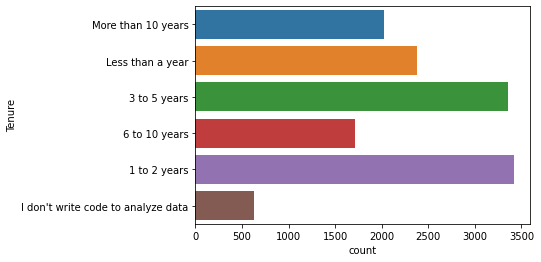

In [18]:
# Programing Experience
sns.countplot(y='Tenure', data=mcq)

Note: Tenure is a question of how much coding experience you have in data science. Most of them are less than 5 years, especially many people with 1 ~ 2 years of experience.

In [19]:
korea = mcq.loc[(mcq['Country']=='South Korea')]
korea.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
356,Male,South Korea,27.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,Female,South Korea,36.0,Employed full-time,NaN,NaN,No,Yes,Researcher,Fine,...,Very Important,Very Important,Very Important,Somewhat important,Somewhat important,Very Important,Somewhat important,Not important,Not important,Not important
491,Male,South Korea,34.0,Employed part-time,NaN,NaN,Yes,NaN,Scientist/Researcher,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,Male,South Korea,53.0,Employed full-time,NaN,NaN,Yes,NaN,Researcher,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,Male,South Korea,35.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,Very Important,Not important,Not important,Not important,Somewhat important,Somewhat important,Very Important,Not important,Somewhat important,Not important


In [20]:
print('The number of interviewees in Korea: ' + str(korea.shape[0]))

The number of interviewees in Korea: 194


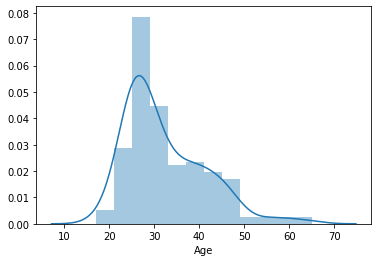

In [21]:
sns.distplot(korea['Age'])

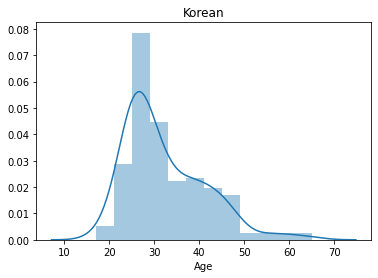

In [22]:
sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [23]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

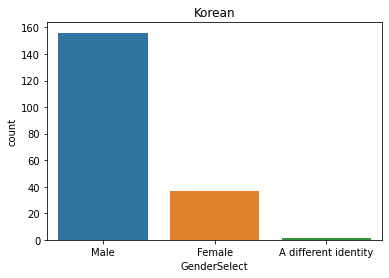

In [24]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

Text(0.5, 1.0, 'korean Male')

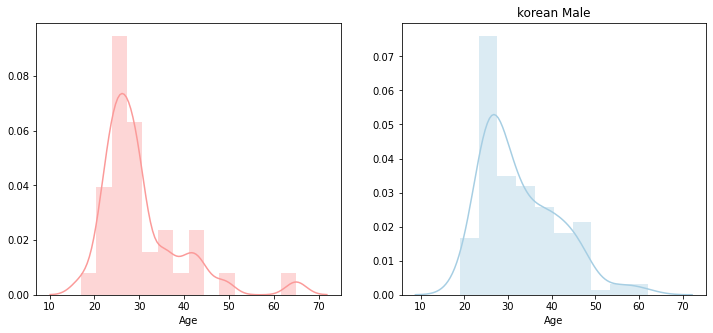

In [25]:
figure, (ax1, ax2) =  plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), norm_hist=False, color=sns.color_palette("Paired")[4],ax=ax1)
plt.title('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), norm_hist=False, color=sns.color_palette("Paired")[0],ax=ax2)
plt.title('korean Male')




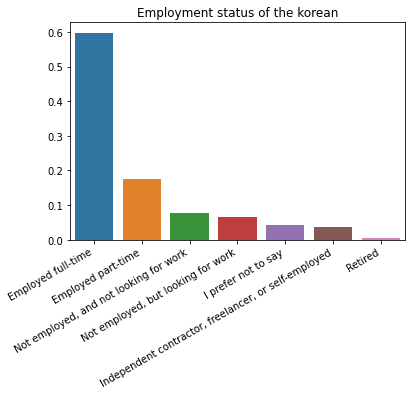

In [26]:
sns.barplot(x=korea['EmploymentStatus'].unique(),y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

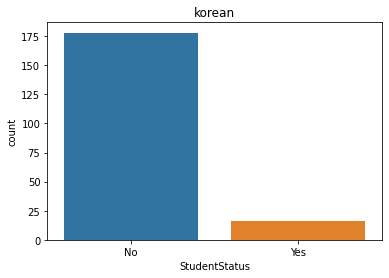

In [27]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [28]:
full_time = mcq.loc[(mcq['EmploymentStatus']=='Employed full-time')]
print(full_time.shape)

looking_for_job = mcq.loc[(mcq['EmploymentStatus']=='Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


## 4. Survey Response Analysis 2
### 4.1 Frequently Asked Questions FAQ
### 1) Q1. Which language should you learn, Python or R?

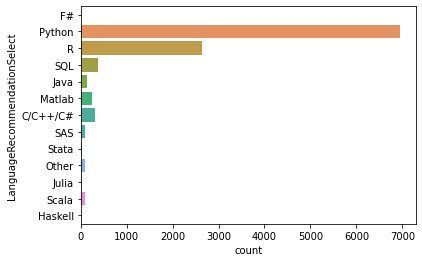

In [29]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

Note : Apparently they seem to prefer Python, and learn the languages 

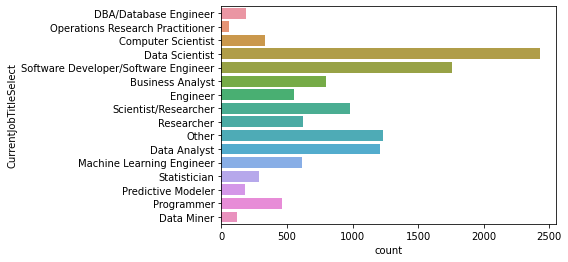

In [30]:
# Current job
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [31]:
# Total number of responses to what you are doing
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape[0]

11830

(7158, 228)


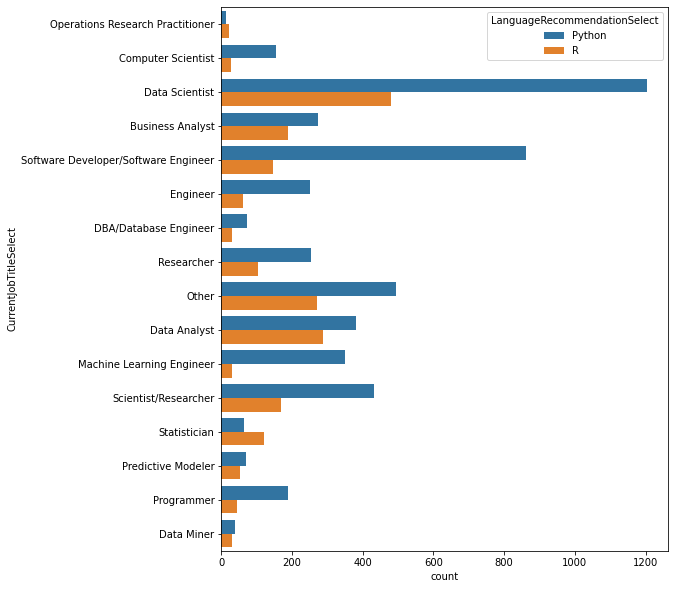

In [32]:
# Those who have responded to what they are doing, who use Python and R

data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
(mcq['LanguageRecommendationSelect']=='Python') | (
mcq['LanguageRecommendationSelect']=='R'))]

print(data.shape)

plt.figure(figsize=(8,10))
sns.countplot(y='CurrentJobTitleSelect', data=data, hue='LanguageRecommendationSelect')

Note: 
Data scientists mainly use Python, but people using R are quite good. But software developers use Python much more, and the professions that use R more than Python are statisticians.

### 2) What will be of great interest in the data science field in the future?

In [33]:
# Data Science Tool
mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
# mcq_ml_tool_count
mcq_ml_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))
# mcq_ml_tool_percent
mcq_ml_tool_df = mcq_ml_tool_count.merge(mcq_ml_tool_percent,left_index=True,right_index=True)
mcq_ml_tool_df.columns = ['num_of_response', 'proportion']
mcq_ml_tool_df.head()

,num_of_response,proportion
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916


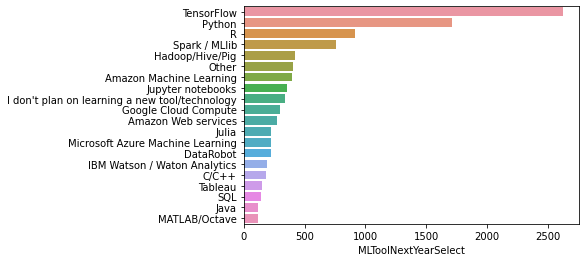

In [34]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)
plt.show()

Note: TensorFlow, Google's deep learning framework, said it would receive the most attention at 23%.
And Python follows 15% and R follows 8%

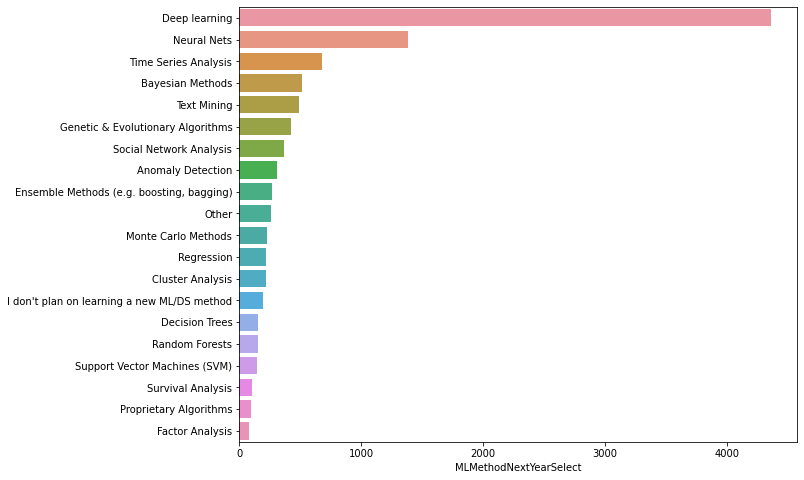

In [37]:
# Data Science Methods
data = mcq['MLMethodNextYearSelect'].value_counts().head(20)
plt.figure(figsize=(10,8))
sns.barplot(y=data.index, x=data)

### 3) Where should you learn data science?

In [44]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))

In [47]:
mcq['LearningPlatformSelect'] 

0        [College/University, Conferences, Podcasts, Tr...
1                                                 [Kaggle]
2        [Arxiv, College/University, Kaggle, Online cou...
3        [Blogs, College/University, Conferences, Frien...
4                   [Arxiv, Conferences, Kaggle, Textbook]
                               ...                        
16711                                                [nan]
16712    [Kaggle, Non-Kaggle online communities, Online...
16713                                                [nan]
16714                                                [nan]
16715                                                [nan]
Name: LearningPlatformSelect, Length: 16716, dtype: object

In [46]:
mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']),axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,College/University,Conferences,Podcasts,Trade book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arxiv,College/University,Kaggle,Online courses,YouTube Videos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Blogs,College/University,Conferences,Friends network,Official documentation,Online courses,Personal Projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arxiv,Conferences,Kaggle,Textbook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16711,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Kaggle,Non-Kaggle online communities,Online courses,Stack Overflow Q&A,YouTube Videos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']),axis=1).stack()

0      0    College/University
       1           Conferences
       2              Podcasts
       3            Trade book
1      0                Kaggle
                   ...        
16712  3    Stack Overflow Q&A
       4        YouTube Videos
16713  0                   nan
16714  0                   nan
16715  0                   nan
Length: 61904, dtype: object

In [51]:
mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=0)

,level_0,0
0,0,College/University
1,0,Conferences
2,0,Podcasts
3,0,Trade book
0,1,Kaggle
...,...,...
3,16712,Stack Overflow Q&A
4,16712,YouTube Videos
0,16713,nan
0,16714,nan


In [52]:
mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=1)

,level_1,0
0,0,College/University
0,1,Conferences
0,2,Podcasts
0,3,Trade book
1,0,Kaggle
...,...,...
16712,3,Stack Overflow Q&A
16712,4,YouTube Videos
16713,0,nan
16714,0,nan


In [55]:
mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=0, drop=True)

0    College/University
1           Conferences
2              Podcasts
3            Trade book
0                Kaggle
            ...        
3    Stack Overflow Q&A
4        YouTube Videos
0                   nan
0                   nan
0                   nan
Length: 61904, dtype: object

In [53]:
mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)

0        College/University
0               Conferences
0                  Podcasts
0                Trade book
1                    Kaggle
                ...        
16712    Stack Overflow Q&A
16712        YouTube Videos
16713                   nan
16714                   nan
16715                   nan
Length: 61904, dtype: object

In [56]:
s = mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name='Platform'

In [61]:
# plt.figure(figsize=(10,8))
s[s != 'nan'].value_counts().head(15)

Kaggle                           6645
Online courses                   6042
Stack Overflow Q&A               5703
YouTube Videos                   5291
Personal Projects                4873
Blogs                            4828
Textbook                         4246
College/University               3397
Arxiv                            2418
Official documentation           2354
Conferences                      2217
Friends network                  1617
Tutoring/mentoring               1458
Podcasts                         1238
Non-Kaggle online communities    1169
Name: Platform, dtype: int64

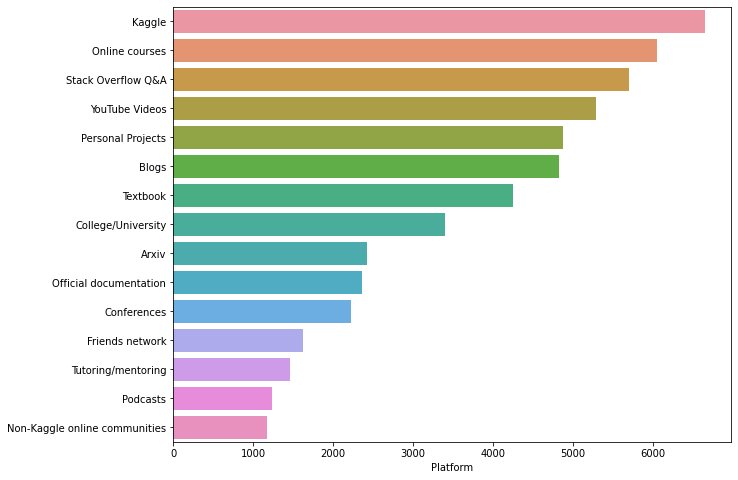

In [62]:
plt.figure(figsize=(10,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

Note:

1) Kaggle is the most popular learning platform among our respondents.
2) However, the answer may have been biased because Kaggle was the place to conduct this survey.
3) 